### Face Detection with OpenCV inclass¶

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# load first image

test_image = cv2.imread('../images/baby-01.jpg')

#convert to grayscale

test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#display the grayscale

plt.imshow(test_image_gray, cmap='gray')

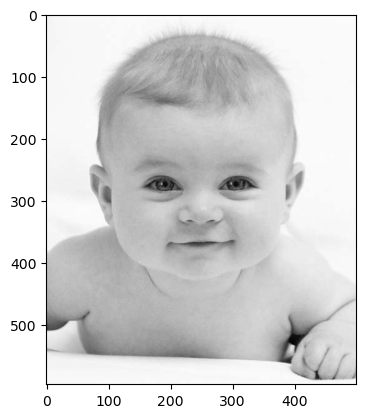

In [42]:
plt.show()

In [44]:
#function to convert image from BGR to RGB

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Apply Haar Cascade

In [47]:
# link with haar cascade facial detection file

haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

#haar_cascade_eye = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

### Face Detection

In [50]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor=1.2, minNeighbors = 5)


# print if face found 

print("No of faces found: ", len(faces_rects))

No of faces found:  1


In [52]:
# draw a rectangle around the place where the face is found

for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x,y), (x+w, y+h), (0, 255, 0), 2)

#display the image

plt.imshow(convertToRGB(test_image))

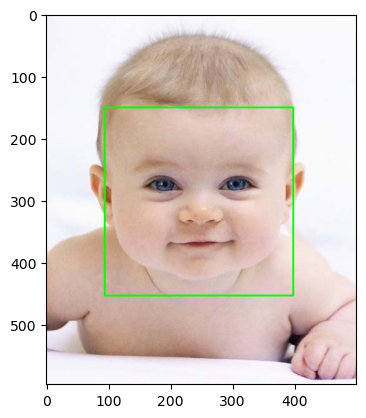

In [54]:
plt.show()

### A generalized function for the entire face detection steps

In [57]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    
    # create a copy of image
    
    image_copy = test_image.copy()
    
    #convert the test image to grayscale openCV expect a grayscale image
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    
    #apply haar cascade classifier to detect faces in the image
    
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x,y,w,h) in faces_rect:
        cv2.rectangle(image_copy, (x,y), (x+w, y+h), (0, 255, 0), 10)
    
    return image_copy

In [59]:
# test on image 2

test_image2 = cv2.imread('../images/baby-02.png')

# call function to detect face

faces = detect_faces(haar_cascade_face, test_image2)

# convert to RGB and display

plt.imshow(convertToRGB(faces))

In [63]:
plt.show()

In [65]:
# test on image 2

test_image3 = cv2.imread('../images/group-01.png')

# call function to detect face

faces = detect_faces(haar_cascade_face, test_image3)

# convert to RGB and display

plt.imshow(convertToRGB(faces))

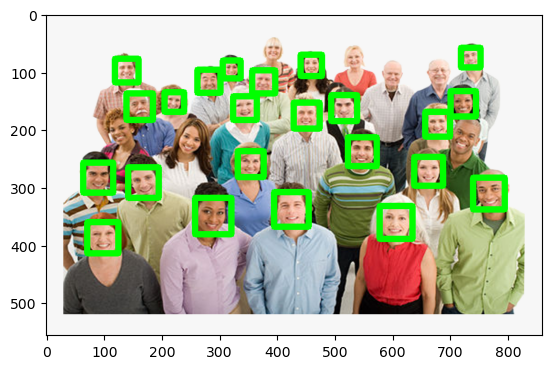

In [67]:
plt.show()

In [69]:
### save image output

cv2.imwrite('../images/myoutputimg.jpg', faces)

True